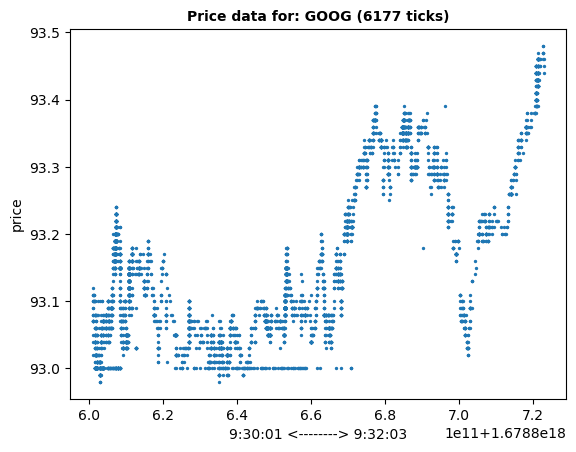

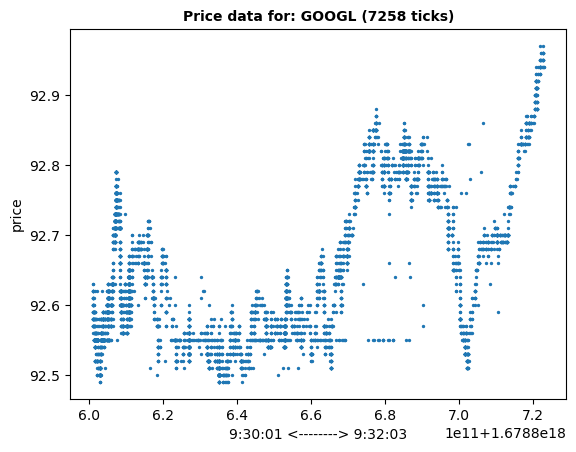

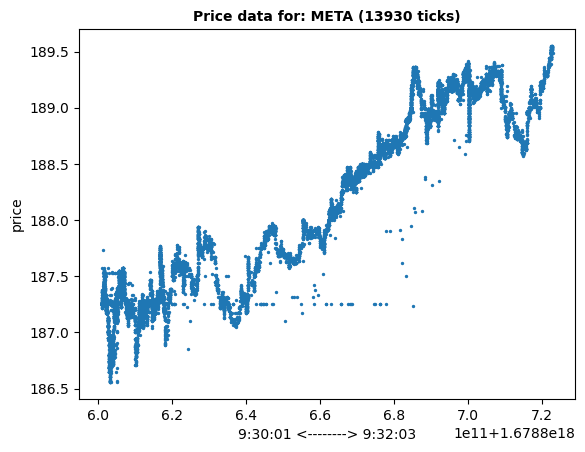

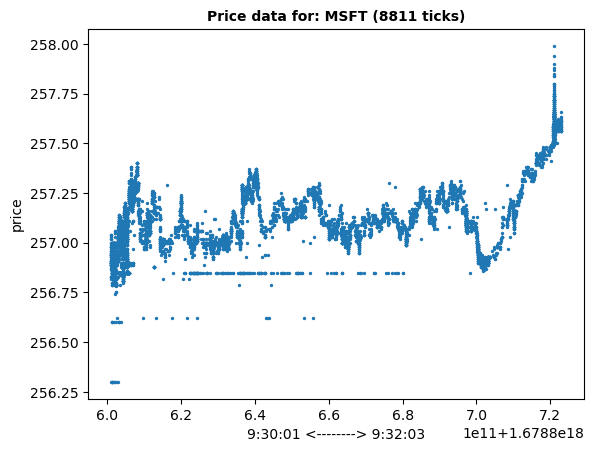

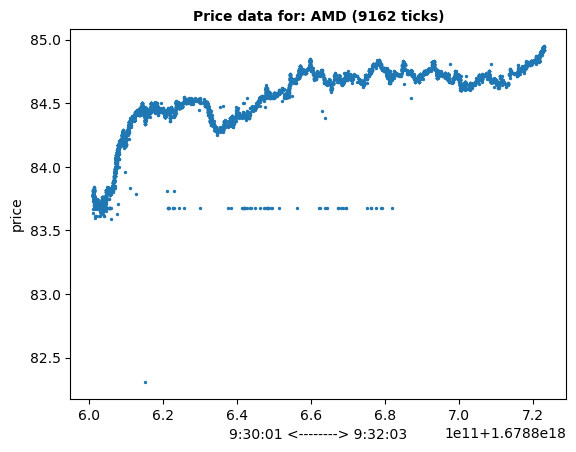

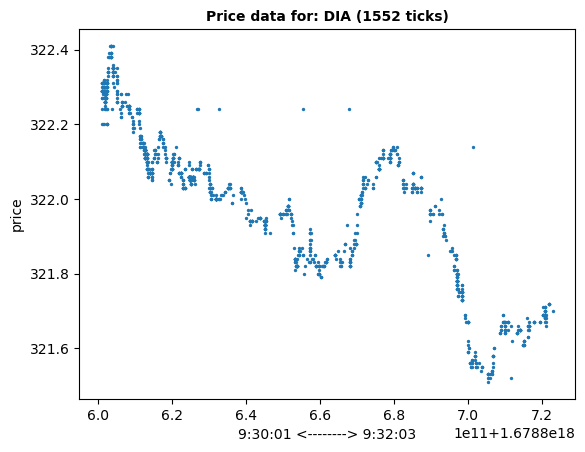

In [10]:
from polygon import RESTClient
import matplotlib.pyplot as plt

client = RESTClient("L_ld7FCHcbp_0ucpNoxau9CYfMitN9wx")

#stocks = ["AAPL","ADBE","GOOGL","NVDA","TEAM","ZS"]
          
#stocks = ["ATVI","ADBE","ADP","ABNB","ALGN","GOOGL","GOOG","AMZN","AMD","AEP","AMGN","ADI","ANSS","AAPL","AMAT","ASML","AZN","TEAM","ADSK","BKR","BIIB","BKNG","AVGO","CDNS","CHTR","CTAS","CSCO","CTSH","CMCSA","CEG","CPRT","CSGP","COST","CRWD","CSX","DDOG","DXCM","FANG","DLTR","EBAY","EA","ENPH","EXC","FAST","FISV","FTNT","GILD","GFS","HON","IDXX","ILMN","INTC","INTU","ISRG","JD","KDP","KLAC","KHC","LRCX","LCID","LULU","MAR","MRVL","MELI","META","MCHP","MU","MSFT","MRNA","MDLZ","MNST","NFLX","NVDA","NXPI","ORLY","ODFL","PCAR","PANW","PAYX","PYPL","PDD","PEP","QCOM","REGN","RIVN","ROST","SGEN","SIRI","SBUX","SNPS","TMUS","TSLA","TXN","VRSK","VRTX","WBA","WBD","WDAY","XEL","ZM","ZS"]

stocks = ["GOOG", "GOOGL", "META", "MSFT", "AMD", "DIA" ]
## this run is to get the data from 9:30 so I can see if there is a mutual downtrend.
## old GTE was 1678800679000000000
## new GTE is 1678800601000000000

for candy in stocks:

    count = 0
    prices = []
    ticks = []
    trades = []
    
    for t in client.list_trades(ticker=candy,timestamp_gte=1678800601000000000,timestamp_lte=1678800723000000000,order="asc",sort="timestamp",limit=50000):
        trades.append(t)
        
#print("Type of object: ",type(trades))   
#print("Length of object: ",len(trades))

    for i in trades:
        count += 1
        line = []
        line = str(i)

#split on parameters I need and stick em in 2 new lists
        x2 = line.partition("price=")[2]
        x3 = line.partition("sip_timestamp=")[2]
        x2 = x2.split(",")[0]
        x3 = x3.split(",")[0]
    
        prices.append(round(float(x2),2))
        ticks.append(int(x3))
    
        if len(prices) != len (ticks):
            print("Count mismatch between data points...very bad!")
            break

    plt.scatter(ticks,prices,s=2)
    plt.title("Price data for: "+candy+" ("+str(count)+" ticks)",fontsize = 10, fontweight ='bold')
    plt.xlabel("9:30:01 <--------> 9:32:03")
    plt.ylabel("price")
    plt.savefig("RESULTS/"+candy+"_ck.png")
    plt.show()

    
    

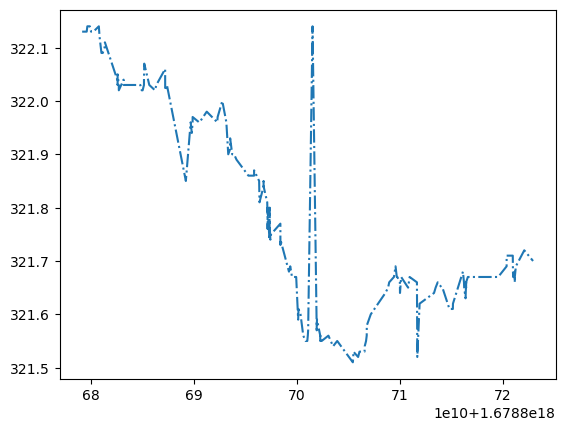

In [8]:
plt.plot(ticks,prices,"-.")